# Import des librairies

In [53]:
#Import the dataset (dataset/car_data/) using torch
import torch
import torch.nn as nn
import os
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn.functional as F
# Plot one image / car model from the dataloader
import matplotlib.pyplot as plt
import torchvision.models as models
import matplotlib.image as mpimg


# Definition du dataset

In [54]:
#Load the train from dataset/car_data/train
path_train = os.path.join('dataset/car_data/car_data/train')
path_test = os.path.join('dataset/car_data/car_data/test')    
# Load the data from folder use DataLoader
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Devide by 255
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

ds_train = datasets.ImageFolder(path_train, transform=transform)
ds_test = datasets.ImageFolder(path_test, transform=transform)

train_dataloader = DataLoader(ds_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(ds_test, batch_size=32, shuffle=True)

# Recreate the dataset to have 90, 10 split
# Split the dataset into 90% training and 10% testing
big_dataset = torch.utils.data.ConcatDataset([ds_train, ds_test])
train_size = int(0.9 * len(big_dataset))
test_size = len(big_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(big_dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)


## Afficher les infos du dataset

In [55]:
# Print the size of the training and testing dataset
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 14566
Test dataset size: 1619


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


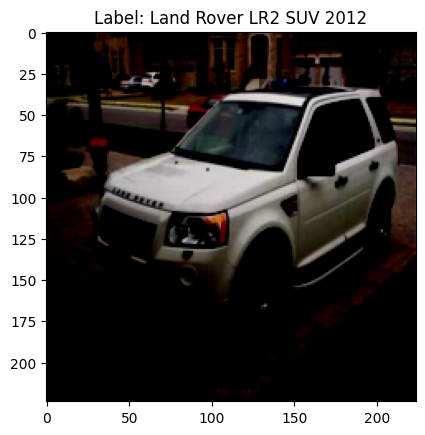

In [56]:

# Load the image
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Get the label name from the original datasets
label_num = train_labels[0]
label_name = ds_train.classes[label_num]

# Plot the image
img = train_features[0].squeeze()
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Label: {label_name}")
plt.show()

In [57]:
# Load the pretrained model (ResNet18) from torchvision.models
model = models.resnet18(pretrained=True)

# Print the model architecture
print(model)

# Train the model using the training dataset

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# Move the model to the device
model = model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [58]:
from tqdm import tqdm

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Wrap the train_dataloader with tqdm for the progress bar
    for i, data in enumerate(tqdm(train_dataloader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss}")

KeyboardInterrupt: 

In [ ]:
# Test the model using the testing dataset
model.eval()